# R Machine Learning Tutorial

This code here loads the necessary Packages for the tutorial to run properly

In [1]:
library(tidyverse)
library(caret)
library(kernlab)
library(ellipse)
library(randomForest)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.3.6      ✔ purrr   0.3.4 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.2      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
Loading required package: lattice


Attaching package: ‘caret’


The following object is masked from ‘package:purrr’:

    lift



Attaching package: ‘kernlab’


The following object is masked from ‘package:purrr’:

    cross


The following object is masked from ‘package:ggplot2’:

    alpha



Attaching package: ‘ellipse’


The following object is masked from ‘package:graphics’:

    pairs


randomForest 4.6-14

Type rfNews() to see new features/changes/bug fixes.


Attaching package: ‘randomForest’


The following object is masked from ‘package:dplyr’:

    combine


The following object is masked f

This code loads in the iris data set from the iris.csv file and assigns it to the object df

In [2]:
dat <- "iris.csv"
df <- read.csv(dat)

The code below assigns the strings in the vector as the columns names of the data frame df

In [3]:
colnames(df) <- c("Sepal.Length","Sepal.Width","Petal.Length","Petal.Width","Species")

This code here provides a brief overview of what the data frame looks like and what it contains

In [4]:
glimpse(df)

Rows: 150
Columns: 5
$ Sepal.Length <dbl> 5.1, 4.9, 4.7, 4.6, 5.0, 5.4, 4.6, 5.0, 4.4, 4.9, 5.4, 4.…
$ Sepal.Width  <dbl> 3.5, 3.0, 3.2, 3.1, 3.6, 3.9, 3.4, 3.4, 2.9, 3.1, 3.7, 3.…
$ Petal.Length <dbl> 1.4, 1.4, 1.3, 1.5, 1.4, 1.7, 1.4, 1.5, 1.4, 1.5, 1.5, 1.…
$ Petal.Width  <dbl> 0.2, 0.2, 0.2, 0.2, 0.2, 0.4, 0.3, 0.2, 0.2, 0.1, 0.2, 0.…
$ Species      <chr> "setosa", "setosa", "setosa", "setosa", "setosa", "setosa…


The code below creates the index value at which to split the data frame into the test and validation datasets.

In [5]:
val_index <- createDataPartition(df$Species, p = 0.80, list=FALSE)

The code here creates the validation dataset from the smaller portion of the data frame, the last 30 rows

In [6]:
val <- df[-val_index,]

The code here creates the training dataset using the first and larger portion of the dataframe, the first 120 rows

In [7]:
ds <- df[val_index,]

The code below gives you the number of rows and columns in the training set, in that order

In [8]:
dim(ds)

[1] 120   5

The code here returns the names of the columns from the training set and the data types each column contains

In [9]:
sapply(ds, class)

Sepal.Length  Sepal.Width Petal.Length  Petal.Width      Species 
   "numeric"    "numeric"    "numeric"    "numeric"  "character"

The code here returns the first 7 rows of the training dataset

In [10]:
head(ds)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
7,4.6,3.4,1.4,0.3,setosa


The code below converts the data type of the enteries in the species column from character to factor, then returns the unique levels in the column

In [11]:
ds[['Species']] <- as.factor(ds[['Species']])
levels(ds[['Species']])

[1] "setosa"     "versicolor" "virginica"

The code below first calculates the percent of enteries each species has in order to determine any biases in the training set, then generates a table containing the count of enteries and percentage of each species

In [12]:
percentage <- prop.table(table(ds[['Species']])) * 100
cbind(freq=table(ds[['Species']]), percentage = percentage)

,freq,percentage
setosa,40,33.33333
versicolor,40,33.33333
virginica,40,33.33333


This code here returns the summary statistics for the features of each species

In [13]:
summary(ds)

  Sepal.Length    Sepal.Width     Petal.Length    Petal.Width   
 Min.   :4.300   Min.   :2.000   Min.   :1.100   Min.   :0.100  
 1st Qu.:5.075   1st Qu.:2.800   1st Qu.:1.600   1st Qu.:0.300  
 Median :5.800   Median :3.000   Median :4.400   Median :1.300  
 Mean   :5.812   Mean   :3.042   Mean   :3.766   Mean   :1.197  
 3rd Qu.:6.400   3rd Qu.:3.300   3rd Qu.:5.100   3rd Qu.:1.800  
 Max.   :7.900   Max.   :4.400   Max.   :6.900   Max.   :2.500  
       Species  
 setosa    :40  
 versicolor:40  
 virginica :40  
                
                
                

This code here splits the data set by column to observe the distribution of each plant feature imdependent of species

In [14]:
x <- ds[, 1:4]
y <- ds[, 5]

The code below visualizes the spread of each plant feature independent of species in four separate boxplots, generating each boxplot in separate runs of the for loop

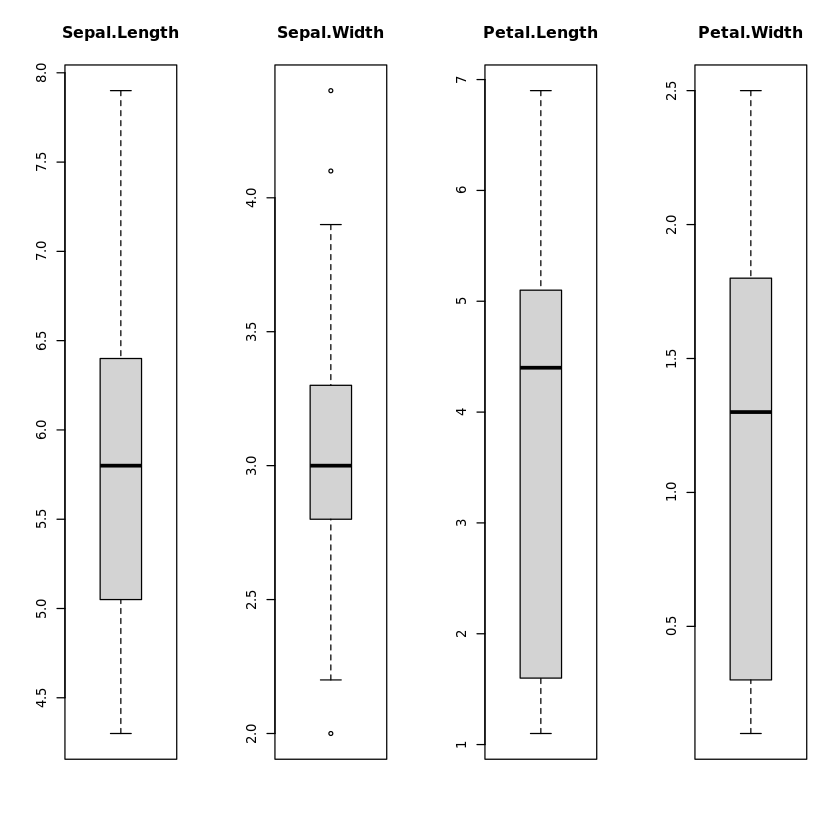

In [15]:
par(mfrow = c(1,4))
for(i in 1:4){
     boxplot(x[,i], main=names(iris)[i])
}

The code below generates a bar plot of the number of enteries for each species, showing that there are 40 flowers of each species

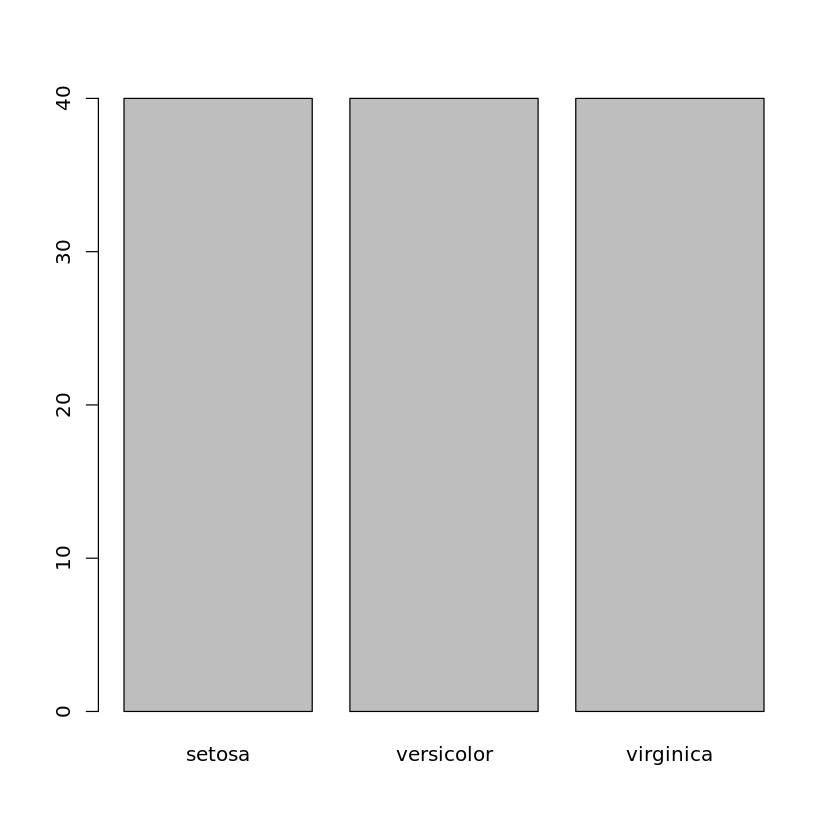

In [16]:
plot(y)

This code here generates an ellipse based scatter plot matrix, visualizing the correlations between each plant feature as determined by species, with the differene colors and ellipses being indicitive of the different species

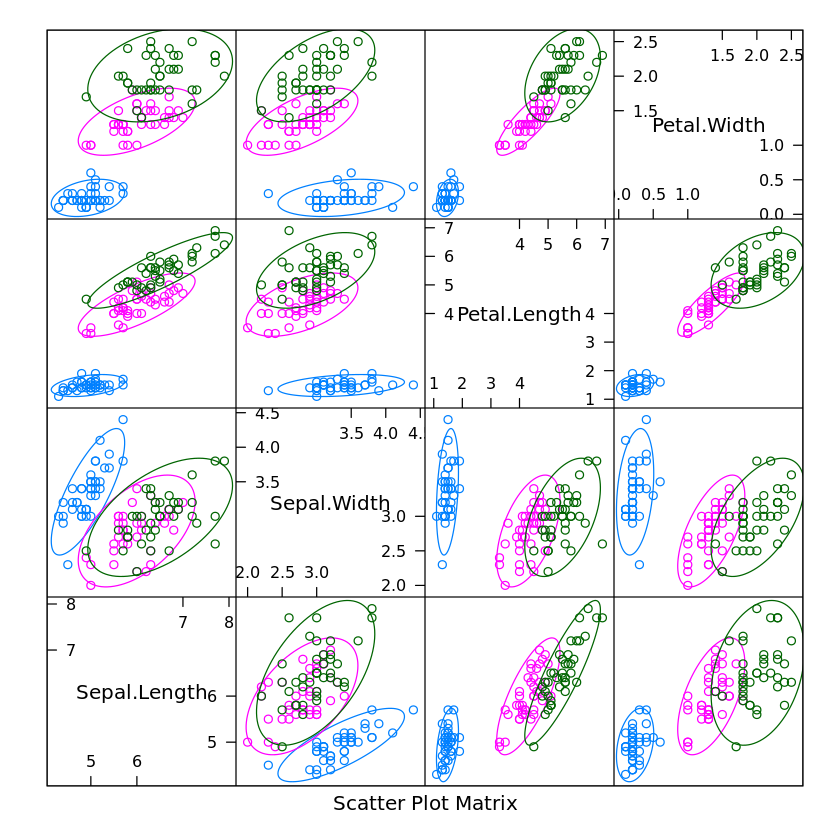

In [17]:
featurePlot(x=x, y=y, plot="ellipse")

This code here creates 4 boxplots visualizing the spread of each plant feature as determined by species

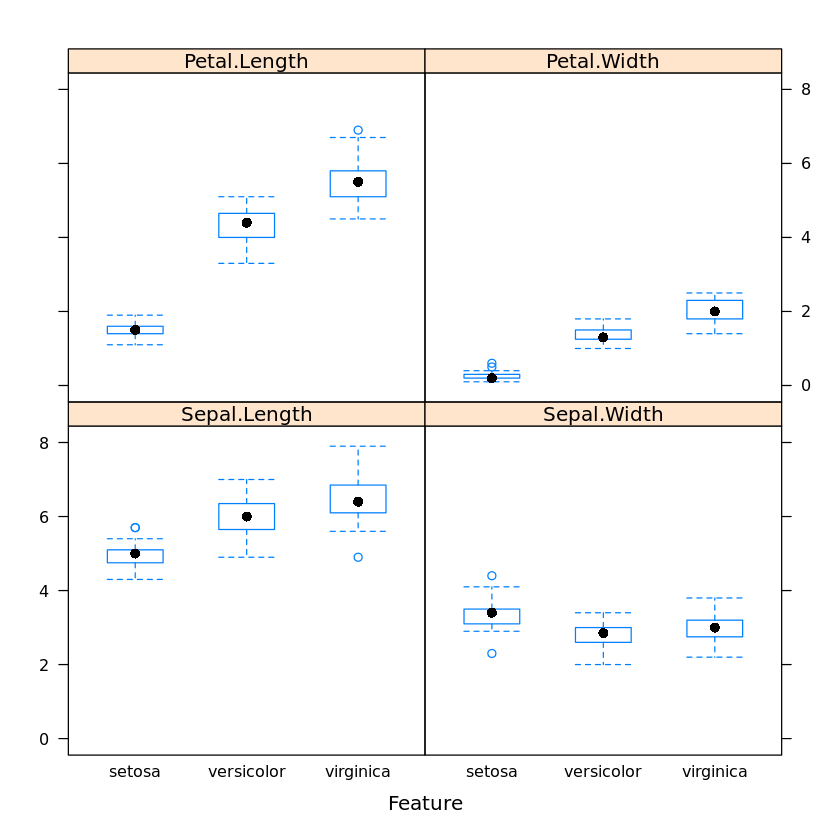

In [18]:
featurePlot(x=x, y=y, plot="box")

The code below creates the scale to split the density plot distribution of each plant feature by species

In [19]:
scales <- list(x = list(relation = "free"), y = list(relation = "free"))


The code below generates the densitiy plots for each plant feature as determined by species

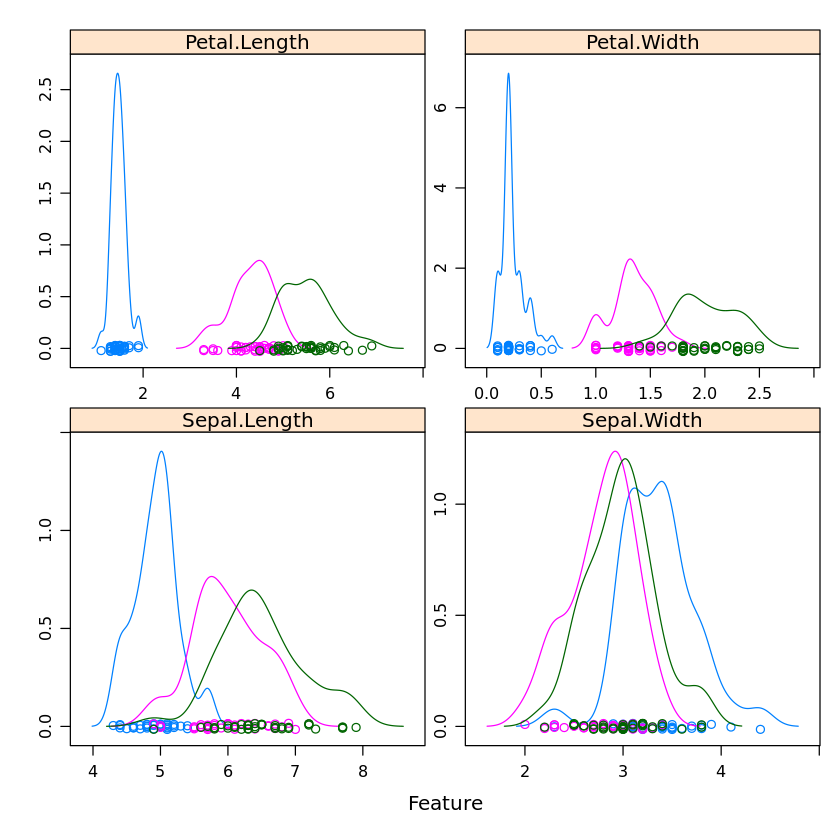

In [20]:
featurePlot(x=x, y=y, plot="density", scales = scales)

This code here splits the training dataset into 10 parts, 12 entries each, 9 to train the models and 1 to test. It also determines the metric on how to evaluate model

In [21]:
control <- trainControl(method = "cv", number=10)
metric <- "Accuracy" 

The code below creates a Linear Algorithm model

In [22]:
set.seed(7)
fit.lda <- train(Species~., data=ds, method="lda", metric=metric, trControl=control)

The code below creates two Nonlinear Algorithms, a CART model and a kNN model respectively

In [23]:
set.seed(7)
fit.cart <- train(Species~., data=ds, method="rpart", metric=metric, trControl=control)

set.seed(7)
fit.knn <- train(Species~., data=ds, method="knn", metric=metric, trControl=control)

the code below creates two Advanced Algorithms, an SVM model and an RF model

In [24]:
set.seed(7)
fit.svm <- train(Species~., data=ds, method="svmRadial", metric=metric, trControl=control)

set.seed(7)
fit.rf <- train(Species~., data=ds, method="rf", metric=metric, trControl=control)

This code here returns the summary statistics for the accuracy and kappa of each model, this demonstrates that the linear model is the most accurate

In [25]:
results <- resamples(list(lda=fit.lda, cart=fit.cart, knn=fit.knn, svm=fit.svm, rf=fit.rf))
summary(results)


Call:
summary.resamples(object = results)

Models: lda, cart, knn, svm, rf 
Number of resamples: 10 

Accuracy 
          Min.   1st Qu.    Median      Mean 3rd Qu. Max. NA's
lda  0.9166667 1.0000000 1.0000000 0.9833333       1    1    0
cart 0.8333333 0.9166667 0.9166667 0.9333333       1    1    0
knn  0.8333333 0.9375000 1.0000000 0.9666667       1    1    0
svm  0.8333333 0.9166667 0.9583333 0.9416667       1    1    0
rf   0.8333333 0.9166667 0.9166667 0.9416667       1    1    0

Kappa 
      Min. 1st Qu. Median   Mean 3rd Qu. Max. NA's
lda  0.875 1.00000 1.0000 0.9750       1    1    0
cart 0.750 0.87500 0.8750 0.9000       1    1    0
knn  0.750 0.90625 1.0000 0.9500       1    1    0
svm  0.750 0.87500 0.9375 0.9125       1    1    0
rf   0.750 0.87500 0.8750 0.9125       1    1    0


The code here visualizes the spread of the accuracies and kappa values for each model, the linear model is still the most accurate

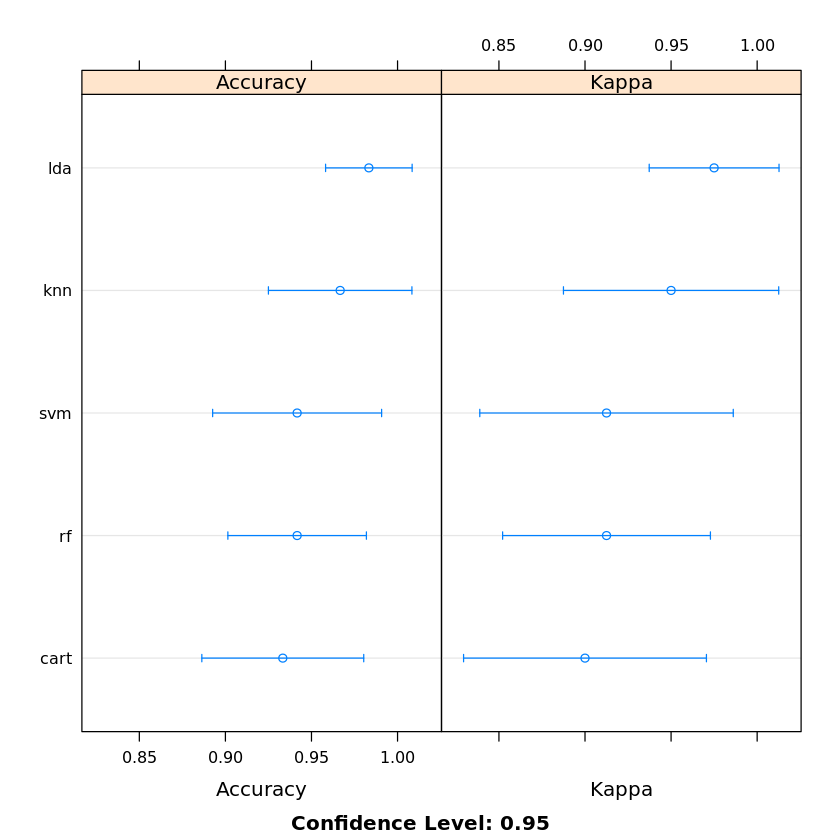

In [26]:
dotplot(results)

The code below is printing the summary of how accurate the model is at evaluating entries for the data set

In [27]:
print(fit.lda)

Linear Discriminant Analysis 

120 samples
  4 predictor
  3 classes: 'setosa', 'versicolor', 'virginica' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 108, 108, 108, 108, 108, 108, ... 
Resampling results:

  Accuracy   Kappa
  0.9833333  0.975



This code is printing the column names and data types for each cloumn in the validation dataset

In [28]:
sapply(val, class)

Sepal.Length  Sepal.Width Petal.Length  Petal.Width      Species 
   "numeric"    "numeric"    "numeric"    "numeric"  "character"

This code here is returning the number of rows and columns, in that order

In [29]:
dim(val)

[1] 30  5

This code here tests the accuracy of the model using the validation dataset by first converting the species column data type from character to factor. It then generates predictions of species type based on the attribute enteries for each row. The code then determines the azccuracy of each prediction by comparing the output to the actual species listed in the species column. The table generated shows it was correct 96.7% of the time, meaning it got 29 correct.

In [30]:
val[['Species']] <- as.factor(val[['Species']])
predictions <- predict(fit.lda, val)
confusionMatrix(predictions, val[['Species']])

Confusion Matrix and Statistics

            Reference
Prediction   setosa versicolor virginica
  setosa         10          0         0
  versicolor      0         10         1
  virginica       0          0         9

Overall Statistics
                                          
               Accuracy : 0.9667          
                 95% CI : (0.8278, 0.9992)
    No Information Rate : 0.3333          
    P-Value [Acc > NIR] : 2.963e-13       
                                          
                  Kappa : 0.95            
                                          
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: setosa Class: versicolor Class: virginica
Sensitivity                 1.0000            1.0000           0.9000
Specificity                 1.0000            0.9500           1.0000
Pos Pred Value              1.0000            0.9091           1.0000
Neg Pred Value              1.0000            1.0000           0.9524
P